In [1]:
# https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn import datasets
from sklearn import metrics

df = pd.read_csv("Employee.csv")

Preprocess data

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Since Education, City, Gender, and EverBenched are of type String, we will convert to integers

In [5]:
# list unique column values
for column in df.columns:
  print("Values in " + column + ": ", end="")
  a = df[column].unique()
  print(sorted(a))

Values in Education: ['Bachelors', 'Masters', 'PHD']
Values in JoiningYear: [2012, 2013, 2014, 2015, 2016, 2017, 2018]
Values in City: ['Bangalore', 'New Delhi', 'Pune']
Values in PaymentTier: [1, 2, 3]
Values in Age: [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Values in Gender: ['Female', 'Male']
Values in EverBenched: ['No', 'Yes']
Values in ExperienceInCurrentDomain: [0, 1, 2, 3, 4, 5, 6, 7]
Values in LeaveOrNot: [0, 1]


In [6]:
# convert Education, City, Gender, and EverBenched
df['Education'] = df['Education'].apply(lambda x: 0 if x == 'Bachelors' else (1 if x == 'Masters' else 2))
df['City'] = df['City'].apply(lambda x: 0 if x == 'Bangalore' else (1 if x == 'Pune' else 2))
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['EverBenched'] = df['EverBenched'].apply(lambda x: 1 if x == 'No' else 0)

In [7]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,1,0,0
1,0,2013,1,1,28,0,1,3,1
2,0,2014,2,3,38,0,1,2,0
3,1,2016,0,3,27,1,1,5,1
4,1,2017,1,3,24,1,0,2,1


In [8]:
df.describe()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653.00000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,0.26456,2015.062970,0.769826,2.698259,29.393295,0.597034,0.897271,2.905652,0.343864
std,0.52112,1.863377,0.821372,0.561435,4.826087,0.490547,0.303638,1.558240,0.475047
min,0.00000,2012.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,2013.000000,0.000000,3.000000,26.000000,0.000000,1.000000,2.000000,0.000000
50%,0.00000,2015.000000,1.000000,3.000000,28.000000,1.000000,1.000000,3.000000,0.000000
75%,0.00000,2017.000000,1.000000,3.000000,32.000000,1.000000,1.000000,4.000000,1.000000
max,2.00000,2018.000000,2.000000,3.000000,41.000000,1.000000,1.000000,7.000000,1.000000


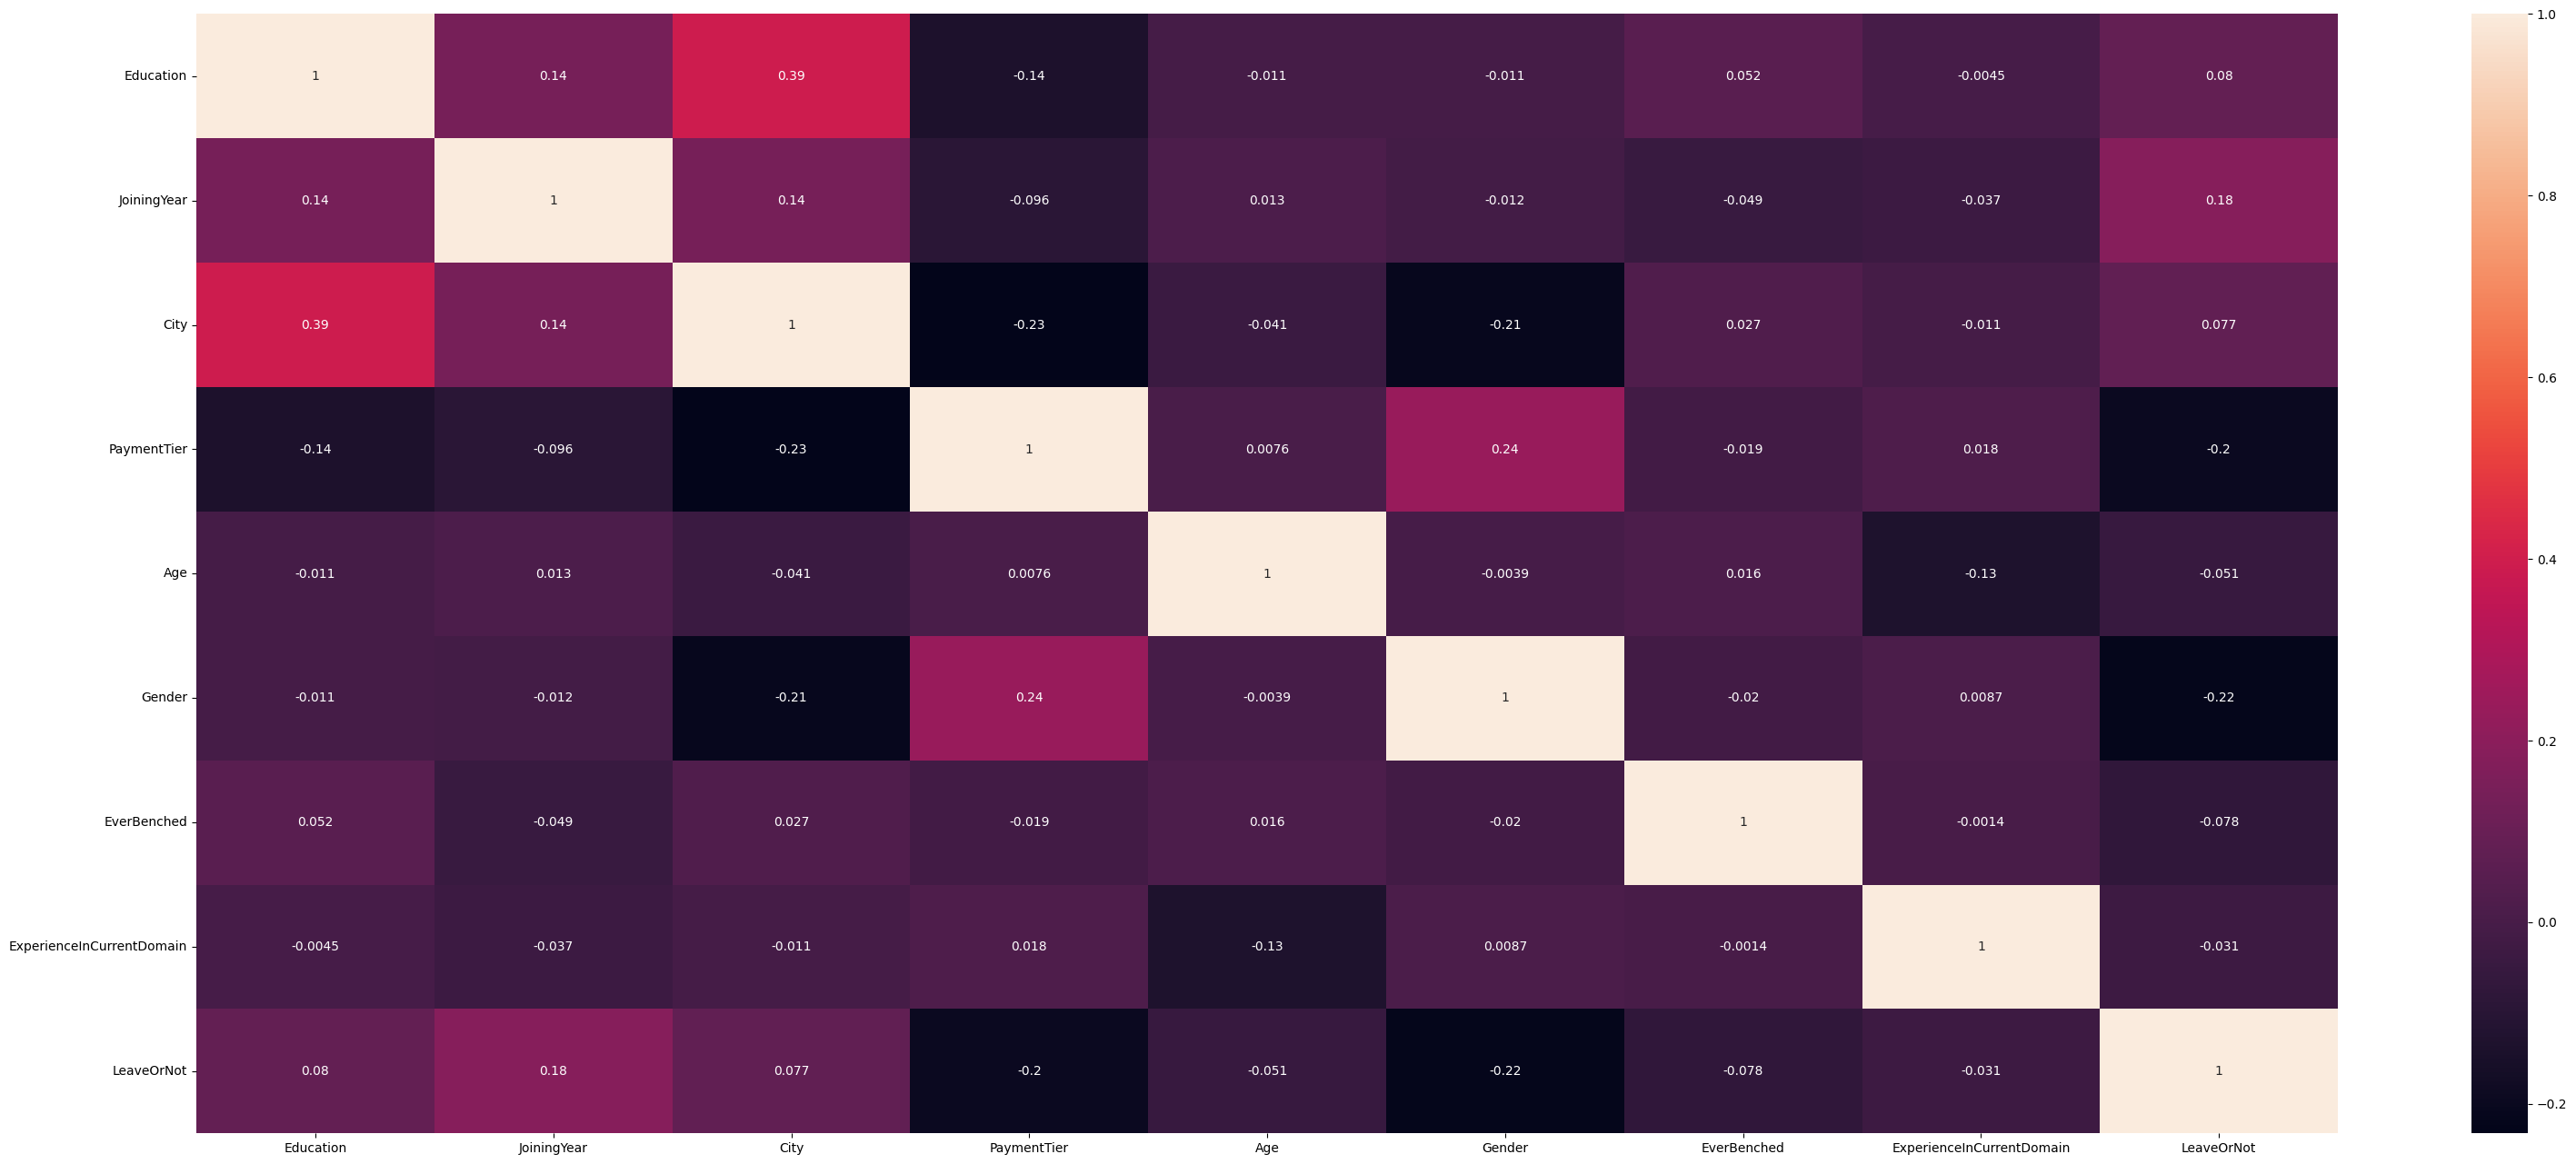

In [9]:
# Looking at linear correlation of the columns
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

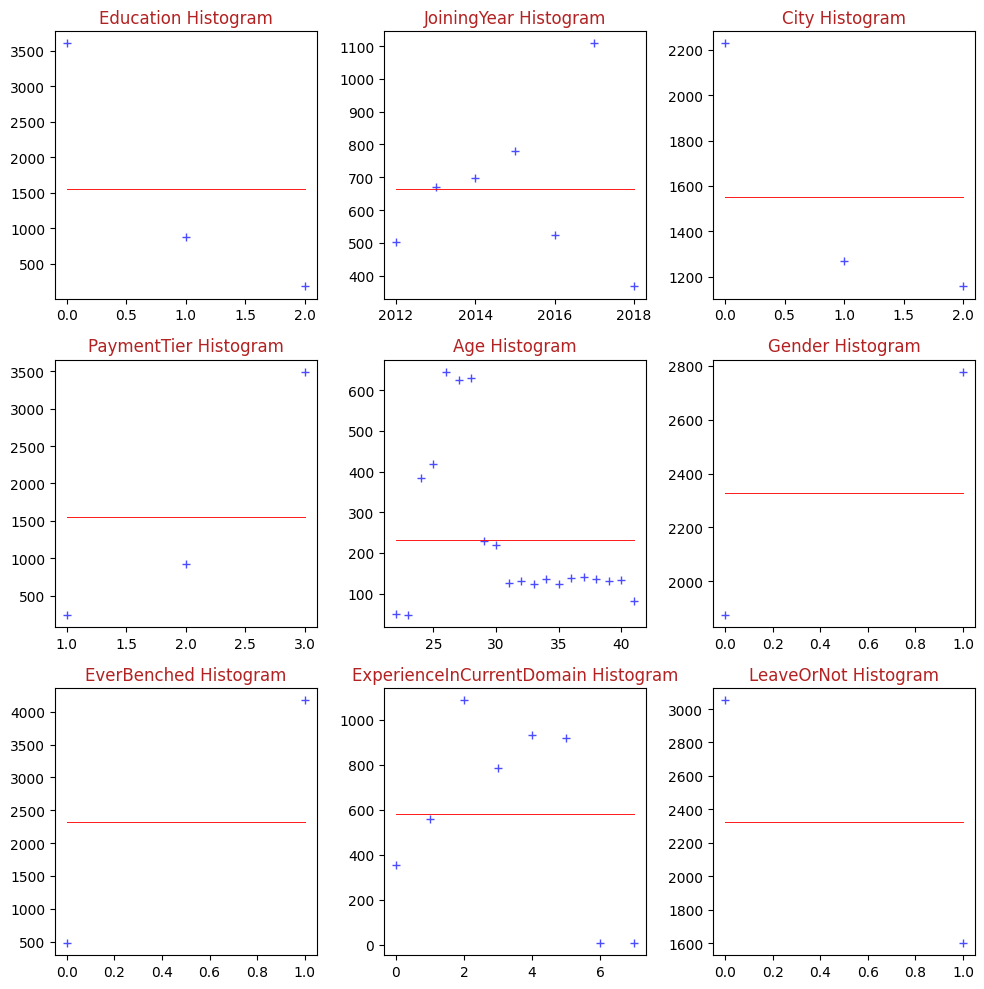

In [10]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
fig = plt.figure(figsize=(10,10))
for i, feature in enumerate(df.columns):
    f = fig.add_subplot(3, 3, i + 1)

    accidents = df.groupby([feature]).size()
    mean = pd.Series(data=accidents.mean(), index=accidents.index.tolist())

    f.plot(accidents, 'b+', lw=0.7, alpha=0.7)
    f.plot(mean, 'r', lw=0.7, alpha=0.9)
    f.set_title(feature + " Histogram", color = colors[35])
fig.tight_layout()
plt.show()

No dicernable outliers

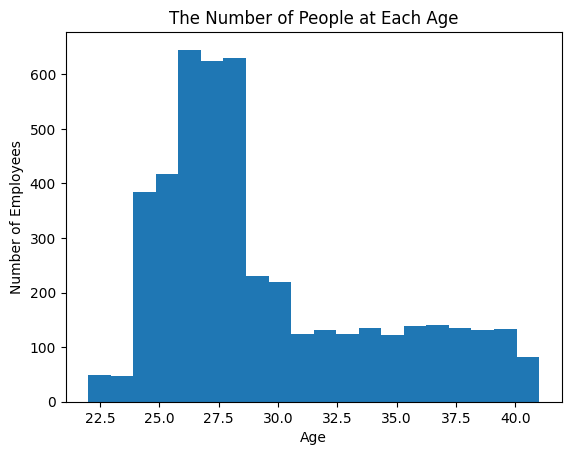

In [11]:
age = pd.Series(df.Age)
plt.hist(age, histtype = 'stepfilled', bins = 20)
plt.title("The Number of People at Each Age")
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()

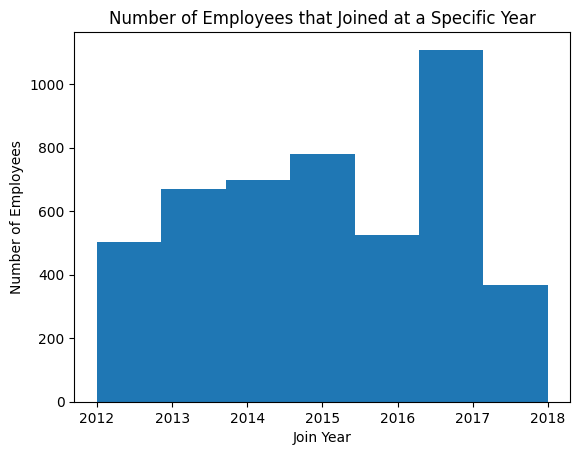

In [12]:
year = pd.Series(df.JoiningYear)
plt.hist(year, histtype = 'stepfilled', bins = 7)
plt.title("Number of Employees that Joined at a Specific Year")
plt.xlabel("Join Year")
plt.ylabel("Number of Employees")
plt.show()

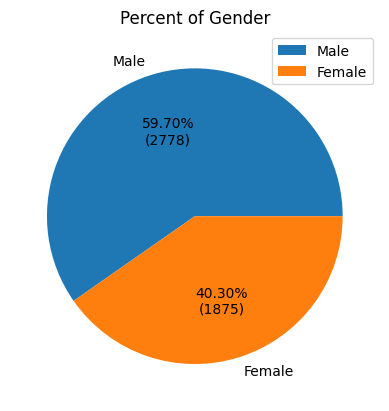

In [13]:
gender = pd.Series(df.Gender)
labels = 'Male', 'Female'
sizes = [2778, 1875]

def pieValues(x):
  return '{:.2f}%\n({:.0f})'.format(x, gender.size*x/100)

plt.title("Percent of Gender")
plt.pie(sizes, labels=labels, autopct=pieValues)
plt.legend()
plt.show()

In [14]:
# Visualize data


In [15]:
# Split data and target
data = df.drop(['LeaveOrNot'], axis=1)
target = df['LeaveOrNot'].values

In [16]:
# Scale values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

Test models K times

In [17]:
n_trials = 25
mean_accuracy_models = []
all_conf_matrix = False

In [18]:
# import modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from statistics import mean

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

Trial 1  for Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       620
           1       0.63      0.36      0.46       311

    accuracy                           0.72       931
   macro avg       0.68      0.63      0.63       931
weighted avg       0.70      0.72      0.69       931

Trial 2  for Logistic Regression
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       607
           1       0.56      0.27      0.36       324

    accuracy                           0.67       931
   macro avg       0.63      0.58      0.57       931
weighted avg       0.65      0.67      0.63       931

Trial 3  for Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       610
           1       0.62      0.36      0.46       321

    accuracy                           0.70       931
   macro avg       0.67      

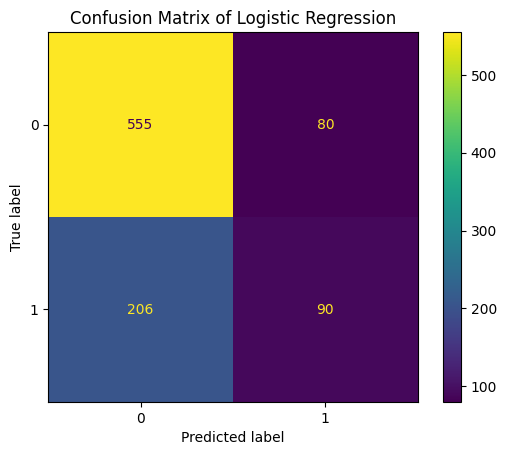

<function matplotlib.pyplot.show(close=None, block=None)>

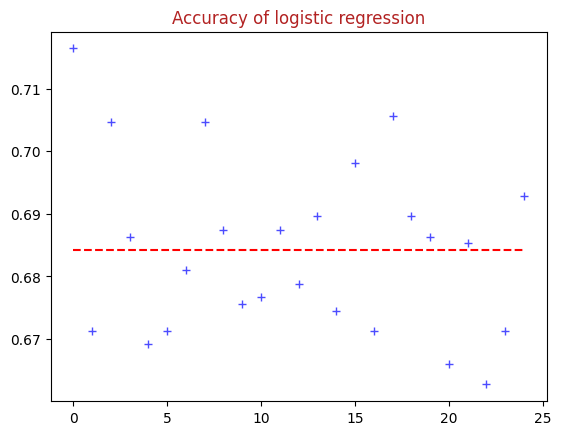

In [20]:
# logistic regression

lrAccuracy = []
flag = True
for i in range(n_trials):
  # split data
  x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
  # fit model
  lr = LogisticRegression()
  lr.fit(x_train, y_train)
  # predict
  pred = lr.predict(x_test)
  # metrics
  print("Trial", i+1, " for Logistic Regression")

  print(classification_report(y_test, pred))
  acc = accuracy_score(y_test, pred)
  lrAccuracy.append(acc)

  # only print last confusion matrix
  if (i == n_trials-1) or (all_conf_matrix):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title("Confusion Matrix of Logistic Regression")
    plt.show()
    flag = False

  print("===================================================================")

fig, ax = plt.subplots()
ax.plot(lrAccuracy, 'b+', lw=0.7, alpha=0.7)
mean_acc = mean(lrAccuracy)
# add accuracy to list
mean_accuracy_models.append(mean_acc)
ax.hlines(y = mean_acc, color = 'r', linestyle = 'dashed', xmin = 0, xmax = len(lrAccuracy) - 1)
ax.set_title("Accuracy of logistic regression", color = colors[35])
plt.show

Trial 1  for K-means
              precision    recall  f1-score   support

           0       0.56      0.37      0.44       613
           1       0.27      0.44      0.33       318

    accuracy                           0.39       931
   macro avg       0.41      0.41      0.39       931
weighted avg       0.46      0.39      0.41       931

Trial 2  for K-means
              precision    recall  f1-score   support

           0       0.67      0.34      0.45       623
           1       0.33      0.66      0.44       308

    accuracy                           0.44       931
   macro avg       0.50      0.50      0.44       931
weighted avg       0.56      0.44      0.45       931

Trial 3  for K-means
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       609
           1       0.46      0.57      0.51       322

    accuracy                           0.62       931
   macro avg       0.60      0.61      0.60       931
weighted av

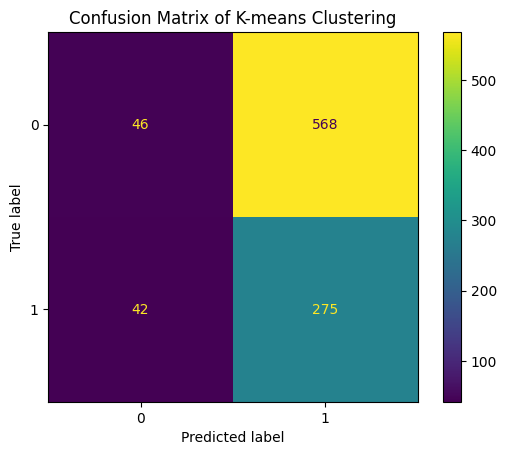

<function matplotlib.pyplot.show(close=None, block=None)>

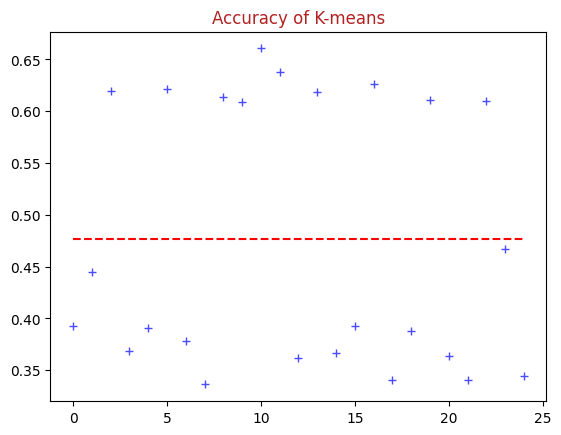

In [21]:
# K-means Clustering

clusAccuracy = []
flag = True
for i in range(n_trials):
  # split data
  x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
  # fit model
  kmeans = KMeans(n_clusters=2, n_init="auto").fit(x_train)
  # predict
  pred = kmeans.predict(x_test)
  # metrics
  print("Trial", i+1, " for K-means")

  print(classification_report(y_test, pred))
  acc = accuracy_score(y_test, pred)
  clusAccuracy.append(acc)

  # only print last confusion matrix
  if (i == n_trials-1) or (all_conf_matrix):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title("Confusion Matrix of K-means Clustering")
    plt.show()
    flag = False

  print("===================================================================")

fig, ax = plt.subplots()
ax.plot(clusAccuracy, 'b+', lw=0.7, alpha=0.7)
mean_acc = mean(clusAccuracy)
# add accuracy to list
mean_accuracy_models.append(mean_acc)
ax.hlines(y = mean_acc, color = 'r', linestyle = 'dashed', xmin = 0, xmax = len(lrAccuracy) - 1)
ax.set_title("Accuracy of K-means", color = colors[35])
plt.show

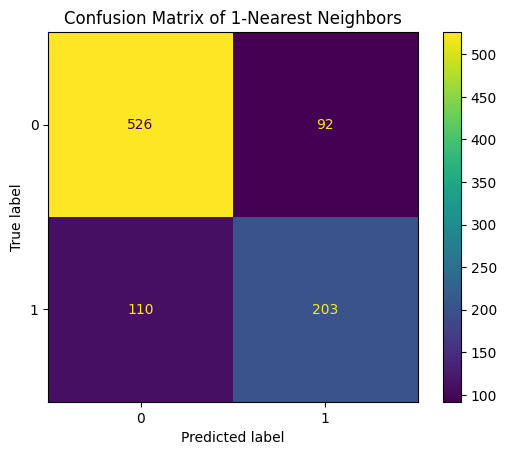

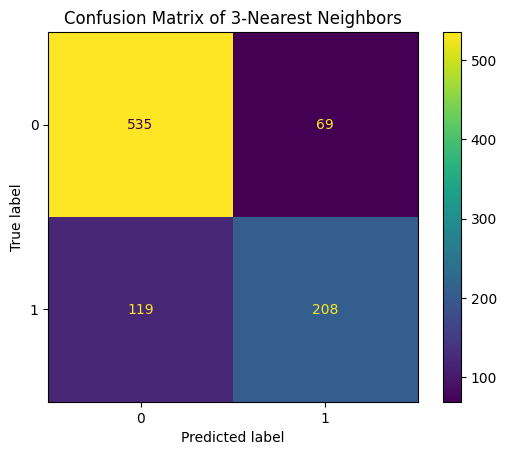

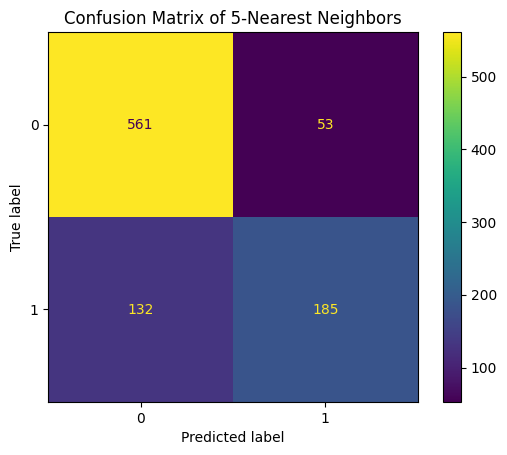

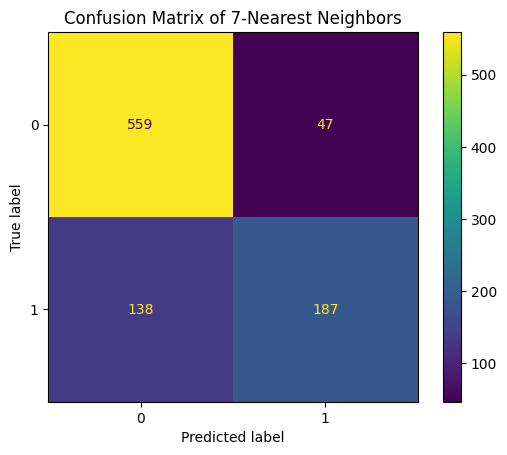

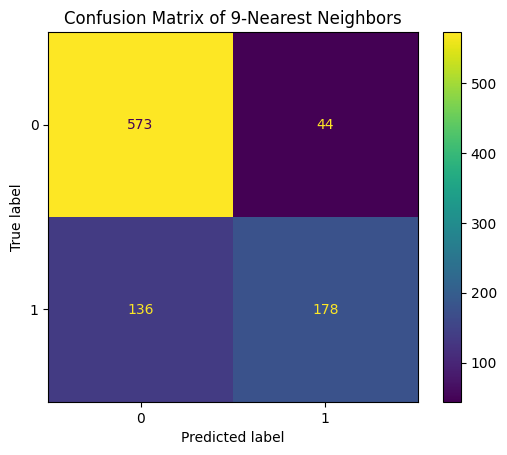

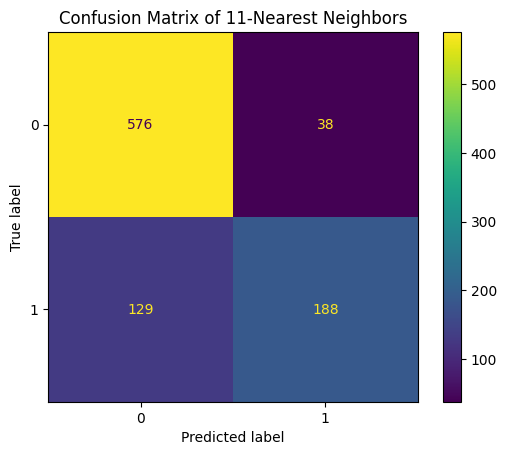

In [22]:
# K-Nearest Neighbors

clusAccuracy = []
flag = True
# train for 1, 3, 5, 7, 9, 11 neighbors
for neigh in range(1, 12, 2):
  neighborAcc = []
  for i in range(n_trials):
    # split data
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

    # fit model
    knn = neighbors.KNeighborsClassifier(n_neighbors = neigh).fit(x_train, y_train)
    # predict
    pred = knn.predict(x_test)
    # metrics
    #print("Trial", i+1, "for", neigh,"-Nearest Neighbors")

    #print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    neighborAcc.append(acc)

    # only print last confusion matrix
    if (i == n_trials-1) or (all_conf_matrix):
      cm = confusion_matrix(y_test, pred)
      disp = ConfusionMatrixDisplay(confusion_matrix=cm)
      disp.plot()
      disp.ax_.set_title(f'Confusion Matrix of {neigh}-Nearest Neighbors')
      plt.show()
      flag = False

    #print("===================================================================")
  clusAccuracy.append(sum(neighborAcc) / len(neighborAcc))

# ax.plot(clusAccuracy, 'b+', lw=0.7, alpha=0.7)
# add accuracy to list
# ax.hlines(y = mean_acc, color = 'r', linestyle = 'dashed', xmin = 0, xmax = len(lrAccuracy) - 1)
# ax.set_title("Accuracy of K Nearest Neighbor", color = colors[35])

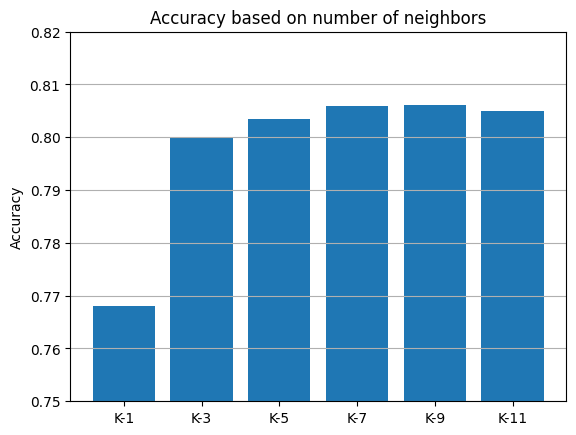

In [23]:
fig, ax = plt.subplots()
# ax.plot(clusAccuracy, 'b+', lw=0.7, alpha=0.7)
mean_acc = mean(clusAccuracy)
# add accuracy to list
mean_accuracy_models.append(mean_acc)
# ax.hlines(y = mean_acc, color = 'r', linestyle = 'dashed', xmin = 0, xmax = len(lrAccuracy) - 1)
# ax.set_title("Accuracy of K Nearest Neighbor", color = colors[35])
ax.bar(['K-1', 'K-3', 'K-5', 'K-7', 'K-9', 'K-11'], clusAccuracy)
plt.title('Accuracy based on number of neighbors')
plt.ylabel("Accuracy")
plt.ylim([0.75, 0.82])
plt.grid(axis = 'y')
plt.show()

Trial 1  for Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       604
           1       0.76      0.65      0.70       327

    accuracy                           0.81       931
   macro avg       0.79      0.77      0.78       931
weighted avg       0.80      0.81      0.80       931

Trial 2  for Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       627
           1       0.74      0.69      0.72       304

    accuracy                           0.82       931
   macro avg       0.80      0.79      0.79       931
weighted avg       0.82      0.82      0.82       931

Trial 3  for Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       616
           1       0.76      0.66      0.71       315

    accuracy                           0.82       931
   macro avg       0.80      0.78      0.79    

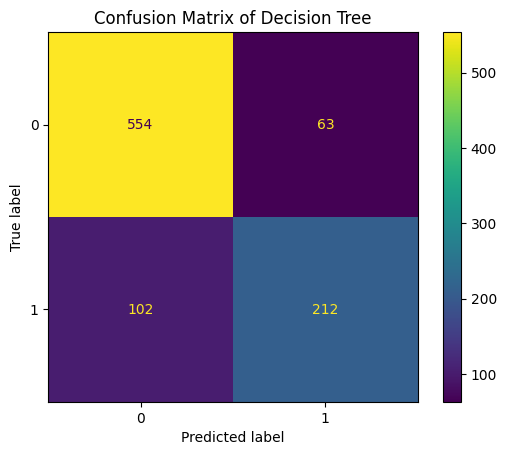

<function matplotlib.pyplot.show(close=None, block=None)>

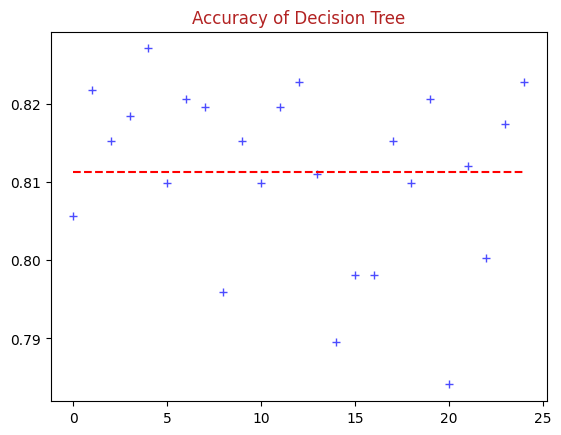

In [24]:
# Decision Tree

treeAccuracy = []
flag = True
for i in range(n_trials):
  # split data
  x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
  # fit model
  tree = DecisionTreeClassifier()
  tree.fit(x_train, y_train)
  # predict
  pred = tree.predict(x_test)
  # metrics
  print("Trial", i+1, " for Decision Tree")

  print(classification_report(y_test, pred))
  acc = accuracy_score(y_test, pred)
  treeAccuracy.append(acc)

  # only print last confusion matrix
  if (i == n_trials-1) or (all_conf_matrix):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title("Confusion Matrix of Decision Tree")
    plt.show()
    flag = False

  print("===================================================================")

fig, ax = plt.subplots()
ax.plot(treeAccuracy, 'b+', lw=0.7, alpha=0.7)
mean_acc = mean(treeAccuracy)
# add accuracy to list
mean_accuracy_models.append(mean_acc)
ax.hlines(y = mean_acc, color = 'r', linestyle = 'dashed', xmin = 0, xmax = len(lrAccuracy) - 1)
ax.set_title("Accuracy of Decision Tree", color = colors[35])
plt.show

Trial 1  for Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       624
           1       0.75      0.64      0.69       307

    accuracy                           0.81       931
   macro avg       0.79      0.76      0.77       931
weighted avg       0.80      0.81      0.80       931

Trial 2  for Random Forest
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       598
           1       0.76      0.67      0.71       333

    accuracy                           0.81       931
   macro avg       0.79      0.77      0.78       931
weighted avg       0.80      0.81      0.80       931

Trial 3  for Random Forest
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       603
           1       0.78      0.71      0.74       328

    accuracy                           0.83       931
   macro avg       0.81      0.80      0.81    

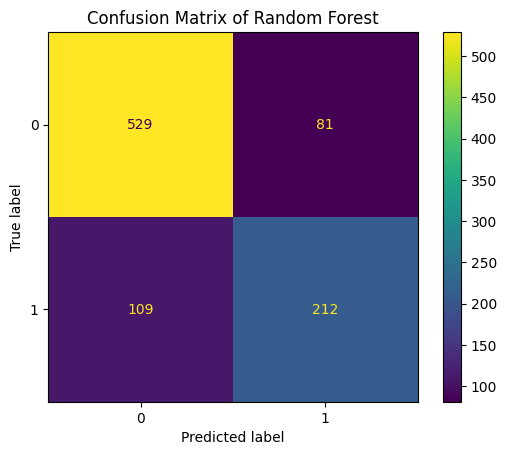

<function matplotlib.pyplot.show(close=None, block=None)>

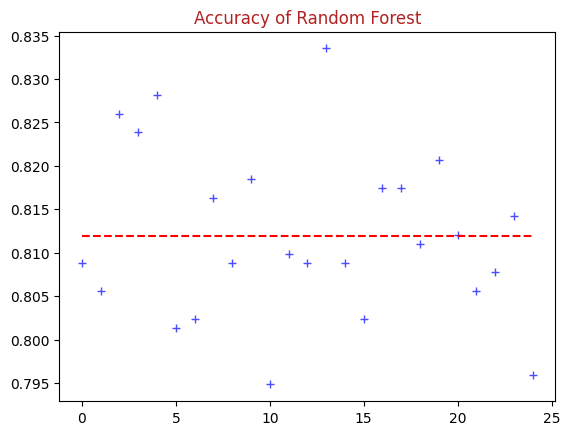

In [25]:
# Random Forest

forestAccuracy = []
flag = True
for i in range(n_trials):
  # split data
  x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
  # fit model
  forest = DecisionTreeClassifier()
  forest.fit(x_train, y_train)
  # predict
  pred = forest.predict(x_test)
  # metrics
  print("Trial", i+1, " for Random Forest")

  print(classification_report(y_test, pred))
  acc = accuracy_score(y_test, pred)
  forestAccuracy.append(acc)

  # only print last confusion matrix
  if (i == n_trials-1) or (all_conf_matrix):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title("Confusion Matrix of Random Forest")
    plt.show()
    flag = False

  print("===================================================================")

fig, ax = plt.subplots()
ax.plot(forestAccuracy, 'b+', lw=0.7, alpha=0.7)
mean_acc = mean(forestAccuracy)
# add accuracy to list
mean_accuracy_models.append(mean_acc)
ax.hlines(y = mean_acc, color = 'r', linestyle = 'dashed', xmin = 0, xmax = len(lrAccuracy) - 1)
ax.set_title("Accuracy of Random Forest", color = colors[35])
plt.show

Trial 1  for SVM
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       608
           1       0.91      0.61      0.73       323

    accuracy                           0.84       931
   macro avg       0.87      0.79      0.81       931
weighted avg       0.85      0.84      0.83       931

Trial 2  for SVM
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       618
           1       0.84      0.63      0.72       313

    accuracy                           0.84       931
   macro avg       0.84      0.79      0.80       931
weighted avg       0.84      0.84      0.83       931

Trial 3  for SVM
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       625
           1       0.87      0.58      0.70       306

    accuracy                           0.83       931
   macro avg       0.85      0.77      0.79       931
weighted avg       0.84

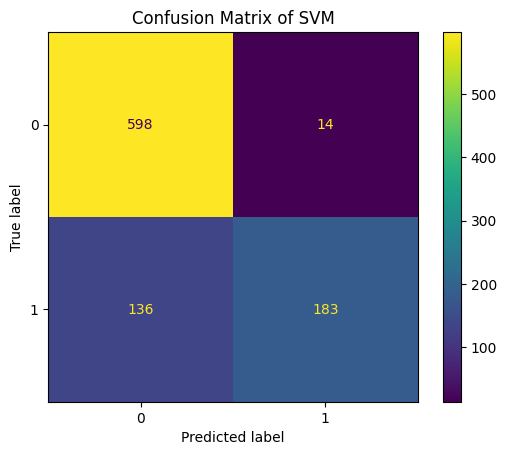

<function matplotlib.pyplot.show(close=None, block=None)>

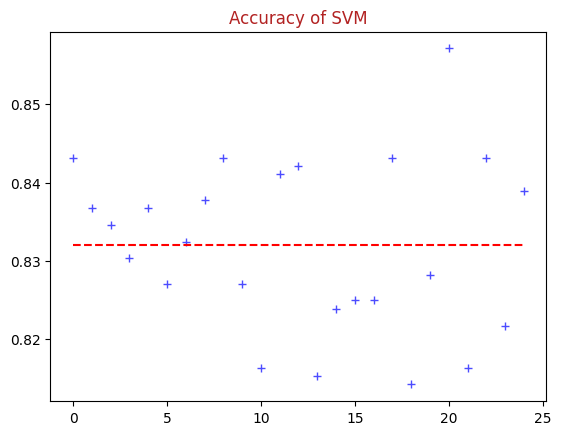

In [26]:
# SVM

SVMAccuracy = []
flag = True
for i in range(n_trials):
  # split data
  x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
  # fit model
  SVM = SVC()
  SVM.fit(x_train, y_train)
  # predict
  pred = SVM.predict(x_test)
  # metrics
  print("Trial", i+1, " for SVM")

  print(classification_report(y_test, pred))
  acc = accuracy_score(y_test, pred)
  SVMAccuracy.append(acc)

  # only print last confusion matrix
  if (i == n_trials-1) or (all_conf_matrix):
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    disp.ax_.set_title("Confusion Matrix of SVM")
    plt.show()
    flag = False

  print("===================================================================")

fig, ax = plt.subplots()
ax.plot(SVMAccuracy, 'b+', lw=0.7, alpha=0.7)
mean_acc = mean(SVMAccuracy)
# add accuracy to list
mean_accuracy_models.append(mean_acc)
ax.hlines(y = mean_acc, color = 'r', linestyle = 'dashed', xmin = 0, xmax = len(lrAccuracy) - 1)
ax.set_title("Accuracy of SVM", color = colors[35])
plt.show

[0.6841675617615467, 0.47626208378088075, 0.7980522735409954, 0.8112137486573576, 0.8119871106337272, 0.8320085929108485]


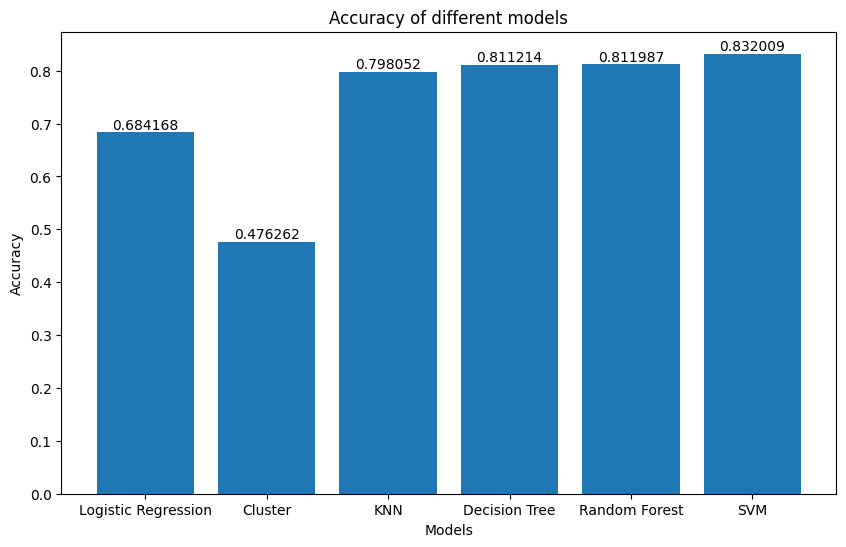

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
models = ["Logistic Regression", "Cluster", "KNN", "Decision Tree", "Random Forest", "SVM"]
print(mean_accuracy_models)
ax.bar(models, mean_accuracy_models)
ax.set_title("Accuracy of different models")
ax.set_ylabel("Accuracy")
ax.set_xlabel("Models")
for bars in ax.containers:
    ax.bar_label(bars)